In [1]:
import gmpy2
from gmpy2 import mpz, gcd # для переопределения pow
import time
time.clock = time.time
import random
from math import ceil, sqrt
import sympy
from hashlib import sha256
from tqdm.notebook import tqdm as log_progress
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from decimal import Decimal
from scipy import interpolate
from scipy.interpolate import interp1d
import random

 1 Задание
 Подпись Эль-Гамаля

In [2]:
def prime_l_bit(l):
    """Generates random prime of L bit"""
    return sympy.randprime(2**l, 2**(l+1)-1) 

"""Внимание

документация библиотеки sympy 
https://docs.sympy.org/latest/modules/ntheory.html
говорит что основывается на постулате Бертрана (1) n/2
наиболее вероятно происходит просто перебот чисел с проверкой их
тестом Миллера Рабина на простоту k*log(n)**3 - сложность

т е общаяя сложность e**(k*log(n/2)**3) где k- константа
"""

'Внимание\n\nдокументация библиотеки sympy \nhttps://docs.sympy.org/latest/modules/ntheory.html\nговорит что основывается на постулате Бертрана (1) n/2\nнаиболее вероятно происходит просто перебот чисел с проверкой их\nтестом Миллера Рабина на простоту k*log(n)**3 - сложность\n\nт е общаяя сложность e**(k*log(n/2)**3) где k- константа\n'

In [3]:
def G(l):
    # p - простое
    p = prime_l_bit(l)
    # g- образующий
    while(True):
        g = random.randint(2, p-1) 
        if((p-1)%g != 1):
            break
    # x - натуральное [2, p-2]
    x= random.randint(1, p-2)
    # y по формуле
    y = pow(g,x,p)
    return p,g,x,y

# ke = (y,g,p)
# kd = x
def S(m,g,p,x):
    h = hash(str(m))  # хешируем сообщение
    # находим к под условия
    while 1:
        k = random.randint(1,p-2)
        if gcd(k,p-1)==1: break
    a = pow(g,k,p)
    kinv = pow(k,-1,p-1)
    b = (kinv*(h-x*a))%(p-1)
    return a,b,k

def V(m,y,g,p,a,b):
    return (pow(y,a,p)*pow(a,b,p))%p == pow(g, hash(str(m)), p)

In [4]:
# 20 секунд в среднем занимает построить и верефицировать
# цифровую подпись на 8192 бита
start = time.time()
p,g,x,y = G(8192)

print(f'p={p},\ng={g},\nx={x},\ny={y}\n')
m= 1234850203988576548987658483
a,b,k = S(m,g,p,x)
print(f'a={a},\nb={b},\nk={k},\n')
# проверка подлинности
print(V(m,y,g,p,a,b))
print(f"algo took {time.time()-start} seconds")

p=18785123668231780049531194610618853805858872944595390081938752605264602990977127500241834641884858698808610730872143752851087060703749068756882931267647928142581200963927057634235957591814292481969442543600769863545230944880266572986769692510891450265028213694456273957795520373099531741773881032523628537382853038205806713172430890144562994695257676878143528115213045441162013536785382861220748285711161236319759477822204611169885173592643262142493133950901316459961966314042139387671471778723403894198823218136943252058883870883377654276655240997916125897920376226232816308854164286336477893783127157898900625784295213426646165451339195482046787805156756694555613116280227524320608937074020827298758677848631697611319751139174353254384109110563798984334890314383362719883508512141917493966334152305402859228105059805614601945960943933679945031178420770077873724251726487334213462970972261134865916510649100858578578366373262462604033127668225834408834930354078816477423141994873829683180931341150

True
algo took 9.196641445159912 seconds


In [49]:
#Функция построения случайного простого числа l бит из библиотеки sympy полиномиальна

timelist = []
datalen = []
for i in log_progress(range(10,6000,25)):
    start = time.time()
    

    p,g,x,y = G(i)

    
    m= 1234850203988576548987658483
    a,b,k = S(m,g,p,x)

    # проверка подлинности
    if not V(m,y,g,p,a,b):
        raise StopIteration()
    
    timelist.append(time.time()-start)
    datalen.append(i)

  0%|          | 0/240 [00:00<?, ?it/s]

In [5]:
#temp data если вычислять на компьютере долго
datalen = [10, 35, 60, 85, 110, 135, 160, 185, 210, 235, 260, 285, 310, 335, 360, 385, 410, 435, 460, 485, 510, 535, 560, 585, 610, 635, 660, 685, 710, 735, 760, 785, 810, 835, 860, 885, 910, 935, 960, 985, 1010, 1035, 1060, 1085, 1110, 1135, 1160, 1185, 1210, 1235, 1260, 1285, 1310, 1335, 1360, 1385, 1410, 1435, 1460, 1485, 1510, 1535, 1560, 1585, 1610, 1635, 1660, 1685, 1710, 1735, 1760, 1785, 1810, 1835, 1860, 1885, 1910, 1935, 1960, 1985, 2010, 2035, 2060, 2085, 2110, 2135, 2160, 2185, 2210, 2235, 2260, 2285, 2310, 2335, 2360, 2385, 2410, 2435, 2460, 2485, 2510, 2535, 2560, 2585, 2610, 2635, 2660, 2685, 2710, 2735, 2760, 2785, 2810, 2835, 2860, 2885, 2910, 2935, 2960, 2985, 3010, 3035, 3060, 3085, 3110, 3135, 3160, 3185, 3210, 3235, 3260, 3285, 3310, 3335, 3360, 3385, 3410, 3435, 3460, 3485, 3510, 3535, 3560, 3585, 3610, 3635, 3660, 3685, 3710, 3735, 3760, 3785, 3810, 3835, 3860, 3885, 3910, 3935, 3960, 3985, 4010, 4035, 4060, 4085, 4110, 4135, 4160, 4185, 4210, 4235, 4260, 4285, 4310, 4335, 4360, 4385, 4410, 4435, 4460, 4485, 4510, 4535, 4560, 4585, 4610, 4635, 4660, 4685, 4710, 4735, 4760, 4785, 4810, 4835, 4860, 4885, 4910, 4935, 4960, 4985, 5010, 5035, 5060, 5085, 5110, 5135, 5160, 5185, 5210, 5235, 5260, 5285, 5310, 5335, 5360, 5385, 5410, 5435, 5460, 5485, 5510, 5535, 5560, 5585, 5610, 5635, 5660, 5685, 5710, 5735, 5760, 5785, 5810, 5835, 5860, 5885, 5910, 5935, 5960, 5985]
timelist= [4.458427429199219e-05, 9.083747863769531e-05, 0.00011849403381347656, 0.00020623207092285156, 0.00029087066650390625, 0.0004382133483886719, 0.0005207061767578125, 0.0004603862762451172, 0.0009007453918457031, 0.0007026195526123047, 0.0009264945983886719, 0.003926277160644531, 0.0014586448669433594, 0.0027856826782226562, 0.0021352767944335938, 0.0032901763916015625, 0.0027573108673095703, 0.008621454238891602, 0.005765199661254883, 0.003484964370727539, 0.019608020782470703, 0.0068509578704833984, 0.005842685699462891, 0.006837368011474609, 0.0055654048919677734, 0.030905485153198242, 0.0127716064453125, 0.023982763290405273, 0.04979228973388672, 0.029518604278564453, 0.01091456413269043, 0.019760847091674805, 0.020589351654052734, 0.03079962730407715, 0.025836706161499023, 0.013872623443603516, 0.0691370964050293, 0.027101993560791016, 0.01520681381225586, 0.06579351425170898, 0.05190920829772949, 0.043393611907958984, 0.022440671920776367, 0.021931171417236328, 0.09229612350463867, 0.06421661376953125, 0.0476231575012207, 0.14189887046813965, 0.1947176456451416, 0.08395600318908691, 0.09878945350646973, 0.03838396072387695, 0.611774206161499, 0.20310425758361816, 0.0511012077331543, 0.2871105670928955, 0.154799222946167, 0.33022236824035645, 0.0757901668548584, 0.0870361328125, 0.12537717819213867, 0.4398517608642578, 0.07757759094238281, 0.7932195663452148, 0.09941482543945312, 0.17159152030944824, 0.264279842376709, 0.0639798641204834, 0.08316588401794434, 0.1714937686920166, 0.2721540927886963, 0.6475341320037842, 0.5927190780639648, 0.48337602615356445, 0.9160261154174805, 0.5195457935333252, 1.7658019065856934, 1.1981658935546875, 0.4440481662750244, 0.6599879264831543, 0.7023353576660156, 0.35370826721191406, 0.9325520992279053, 1.4331614971160889, 1.1222422122955322, 0.30527710914611816, 1.574018955230713, 0.15150141716003418, 0.3043532371520996, 0.6032891273498535, 0.6372175216674805, 0.37917304039001465, 0.9845151901245117, 0.7396180629730225, 1.462228775024414, 1.3496341705322266, 0.19367408752441406, 1.7296018600463867, 0.9490659236907959, 0.30971312522888184, 1.8214802742004395, 7.1601972579956055, 0.9227337837219238, 1.7396135330200195, 3.5450539588928223, 0.3907651901245117, 0.32874107360839844, 0.4456498622894287, 2.484856128692627, 0.5534312725067139, 6.524522304534912, 0.5289368629455566, 1.0883338451385498, 1.1088817119598389, 0.4495058059692383, 2.2635388374328613, 0.36554694175720215, 0.9890408515930176, 5.414370536804199, 6.560654401779175, 5.594407796859741, 4.219059467315674, 2.7659974098205566, 1.9806323051452637, 2.0927860736846924, 0.9026737213134766, 0.7235569953918457, 0.39459943771362305, 1.4946377277374268, 0.44533848762512207, 2.572920083999634, 1.422278881072998, 2.534616470336914, 1.3663876056671143, 0.6917586326599121, 3.782534599304199, 3.453167676925659, 3.5278232097625732, 16.852623224258423, 17.358370542526245, 25.057708024978638, 21.759525537490845, 9.44980001449585, 12.768823862075806, 1.1475965976715088, 6.645104169845581, 5.690056800842285, 2.80410099029541, 18.943076610565186, 2.9068048000335693, 16.533223390579224, 4.55323600769043, 0.9345681667327881, 0.7733502388000488, 19.466267585754395, 12.548147201538086, 2.183581590652466, 3.049954891204834, 1.6895718574523926, 5.75783634185791, 15.762670993804932, 1.546912431716919, 4.4015984535217285, 10.577476263046265, 7.253543138504028, 4.971513271331787, 12.691735744476318, 9.735985517501831, 9.095935821533203, 17.83187747001648, 2.1236557960510254, 14.634733200073242, 12.941681385040283, 1.617508888244629, 11.554923295974731, 3.2863540649414062, 5.791609287261963, 1.3808040618896484, 7.131021738052368, 9.610951662063599, 16.931291818618774, 31.19481658935547, 2.0027337074279785, 4.280557632446289, 7.224123477935791, 33.45414090156555, 2.7019870281219482, 17.869083642959595, 20.14758038520813, 12.632812738418579, 34.83341097831726, 11.158758878707886, 16.753119230270386, 16.29059624671936, 12.594772577285767, 30.540599822998047, 28.969464540481567, 14.147598505020142, 36.11127829551697, 38.146265506744385, 14.180544376373291, 4.002195119857788, 5.142825126647949, 6.671044111251831, 13.426597356796265, 13.09168553352356, 6.956173658370972, 8.281264781951904, 27.893375396728516, 51.15673565864563, 10.880916357040405, 18.057976484298706, 9.544741153717041, 1.4642558097839355, 2.161897897720337, 10.976082563400269, 55.66076707839966, 8.765584707260132, 5.569108963012695, 7.6448328495025635, 77.31501817703247, 4.153446912765503, 5.0168843269348145, 8.851691007614136, 70.09648156166077, 6.245206117630005, 28.22165298461914, 17.455005645751953, 11.852790355682373, 16.71479058265686, 13.73560118675232, 19.33514642715454, 19.939807653427124, 4.936384201049805, 27.709307193756104, 15.029542922973633, 24.26066517829895, 49.74783897399902, 7.505192995071411, 19.33375382423401]

'\nтут я думал что просто смогу аппроксимировать график сложности но я ошибался\nя потратил часов 5 на изучение библиотеки аппроксимации и попытки ее использовать\nно в итоге \nпросто подобрал вручную примерно аппроксимирующую функцию\nно вероятно она не подходящая\nплюс алгоритм отчасти вероятностный и трудно каждый раз подбирать более точную функцию\n'

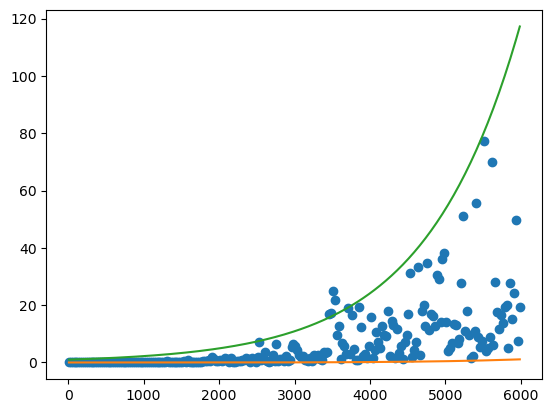

In [6]:

# в лучшем случае функция по графику функция похожа на полиномиальную
# при  этом наибольшая плотность точек наблюдается именно около данной оси 

def f(x):
    return (0.00017*x)**5
res = [f(i) for i in datalen]

# в худшем случае при некоторых обстоятельствах осуществляется почти экспоненциальная сложность
# ps возможно я неправильно аппроксимировал так как недостаточно данных так как функция вычеслительно затратная
def f1(x):
    return (1.01)**(x*0.08)
res1 = [f1(i) for i in datalen]

plt.plot(datalen,timelist,'o',datalen,res,'-',datalen,res1,'-')

"""
тут я думал что просто смогу аппроксимировать график сложности но я ошибался
я потратил часов 5 на изучение библиотеки аппроксимации и попытки ее использовать
но в итоге 
просто подобрал вручную примерно аппроксимирующую функцию
но вероятно она не подходящая
плюс алгоритм отчасти вероятностный и трудно каждый раз подбирать более точную функцию
"""

In [81]:
# 2 задание Электронная цифровая подпись Клауса Шнорра


In [4]:
# def G(n):
#     p = prime_l_bit(n)
#     while 1:
#         q = sympy.randprime(1, p**0.5//1)
#         if (p-1)%q==0:
#             break
#     print(q)
# первый вариант подбора p и q

In [4]:
"""проверка числа на простоту осуществляется пакетом gmpy2
с форума:
'gmpy довольно стандартный. Его подпрограмма is_prime 
представляет собой оболочку теста GMP с 25 тестами MR
по умолчанию с псевдослучайными основаниями. Это не идеально,
но 25 тестов должно быть более чем достаточно.'

я так пронимаю что это тест миллера рабина
вероятность ложной простоты 1/4**25 что является стандартом

https://www.quora.com/How-do-I-determine-whether-a-number-is-a-prime-number-by-using-Python
"""
def G(n):
    while 1:
        q = prime_l_bit(n-1)
        p = 2*q+1
        if gmpy2.is_prime(p):
            break
    g=0
    for i in range(p-1,2,-1):
        if pow(i,q,p)==1:
            g=i
            break
    if g==0:
        raise
    x=random.randint(2,q-1)
    y=pow(g,x,p)
    return y,g,p,q,x

def S(m,g,p,q,x):
    k=random.randint(2,q-1)
    a=pow(g,k,p)
    h=hash(str(a)+str(m))
    b=(k-x*h)%q
    return b, h

def V(m,b,h,y,g,p,q):
    a=(pow(g,b,p)*pow(y,h,p))%p
    return h == hash(str(a)+str(m))

In [12]:
y,g,p,q,x=G(256)
m = 187621873426321862936639842976
b,h=S(m,g,p,q,x)

print(V(m,b,h,y,g,p,q))

True


In [ ]:
# задание 7
m=1
y=545870839
g=1362148
p=1548347543
q=110596253

